<a href="https://colab.research.google.com/github/mattbarreto/001/blob/master/Analisis_de_texto_txt%2C_epub%2C_pdf_v1_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!pip install nltk
!pip install sklearn
!pip install matplotlib
!pip import string
!pip install --upgrade spacy
!pip install spacy-transformers
!python -m spacy download es_dep_news_trf
!python -m spacy download en_core_web_trf
!pip install pyrae

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for sklearn: filename=sklearn-0.0.post1-py3-none-any.whl size=2344 sha256=6477957d573c1b6ccd1a8837735286cb0ab6ae0dc35e4f7e9b8cb2eadc8954ff
  Stored in directory: /root/.cache/pip/wheels/14/25/f7/1cc0956978ae479e75140219088deb7a36f60459df242b1a72
Successfully built sklearn
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
ERROR: unknown command "import"
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 53 kB 2.4 MB/s 
     |████████████████████████████████| 1.2 MB 55.8 MB/s 
     |████████████████████████████████| 5.8 MB 67.0 MB/s 
     |██████

In [ ]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk.corpus import stopwords
import sklearn
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt
import spacy
import spacy_transformers

from bs4 import BeautifulSoup

import re

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
with open('/content/drive/MyDrive/Analisis de Textos/Un_Potrero_Tomado_por_las_masas.docx', 'r', encoding='utf-8') as f:
    texto = f.read()

In [ ]:
def limpiar(texto):
    # signos de puntuación
    puntuación = rf'[{string.punctuation}]'
    texto = re.sub(puntuación, ' ', texto)
    
    # dígitos [0-9]
    texto = re.sub(r'\b\d+\b', '', texto)

    return texto

In [ ]:
# Tokenizamos el texto y filtramos las palabras
tokens = nltk.word_tokenize(texto)
exclusiones = ['━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━','A', 'ver','parte','ella', 'ahora', 'hay', 'así', 'No', 'aquel', 'hace','todos','siempre','me','estar','Lo','eso','acá','sí','desde', 'hacia', 'somos', 'mismo','era','cuando','cada','también','tanto','bajo','sino','qué','dice','luego','si','donde','ya','Otro','otro','uno','Los','te','sin','los','son','ante', 'tan', 'solo', '.',',','de', 'el','la', 'porque', 'En','en', 'hasta','La', 'Sus', 'sus','nos', 'y', 'las', ':', 'como', 'con', ';', 'se','”','“','no', 'un', 'los','del', 'a','que','en', 'El', 'le', '(', ')', 'Y', 'para', 'al', 'su', 'más', '?', 'lo', 'una', 'es', 'por', 'fue', 'sobre', 'todo','pero','o', 'tambien']
tokens = [palabra for palabra in tokens if palabra not in exclusiones]
print(tokens)

['Argentina', 'campeón', 'mundo', 'Un', 'potrero', 'tomado', 'masas', 'fiesta', 'grande', 'mundo', 'masa', 'sacrificada', 'expansiva', '9', 'Julio', 'autopista', 'Riccheri', 'Las', 'calles', 'Buenos', 'Aires', 'copadas', 'cinco', 'millones', 'personas', 'generaron', 'shock', 'inédito', 'delirio', 'habitando', 'territorio', 'tiempo', 'mítico', 'irreal', 'Cada', 'cabulero', 'cumplió', 'deber', 'recibió', 'premio', 'oró', 'Dios', 'ausente', 'aviso', 'tuvo', 'cambiar', 'recorrido', 'fieles', 'fueron', 'paradoja', 'argenta', 'impidieron', 'paso', 'desearlo', 'arrebataron', 'íntegro', 'ritual', 'opuesto', 'velar', 'ausencia', 'festejó', 'soñando', 'presencia', 'prescindiendo', 'dioses', 'omnipresentes', 'Por', 'Sonia', 'Budassi', 'Arte', 'Camila', 'Salcedo', 'Se', 'habla', 'fiesta', 'grande', 'historia', 'circulan', 'imágenes', 'personas', 'aglomeradas', 'tamaño', 'hormiga', 'toda', 'plaga', 'apocalíptica', 'sacrificada', 'juntísima', 'expansiva', '¿vulgar', '9', 'Julio', 'autopista', 'Ricch

In [ ]:
texto_tokenizado = [palabra for palabra in tokens if palabra not in exclusiones]

In [ ]:
# Calculamos la frecuencia de las palabras y obtenemos las palabras más frecuentes
frecuencia = nltk.FreqDist(tokens)
palabras_mas_frecuentes = frecuencia.most_common()
n = 10
for palabra, frecuencia in palabras_mas_frecuentes[:n]:
    print(f'{palabra}: {frecuencia}')

Messi: 13
fútbol: 10
nosotros: 8
jugadores: 8
tiempo: 7
juego: 7
Argentina: 6
campeón: 6
masa: 6
Dibu: 6


In [ ]:
from wordcloud import WordCloud

In [ ]:
import random

In [ ]:
from random import randint

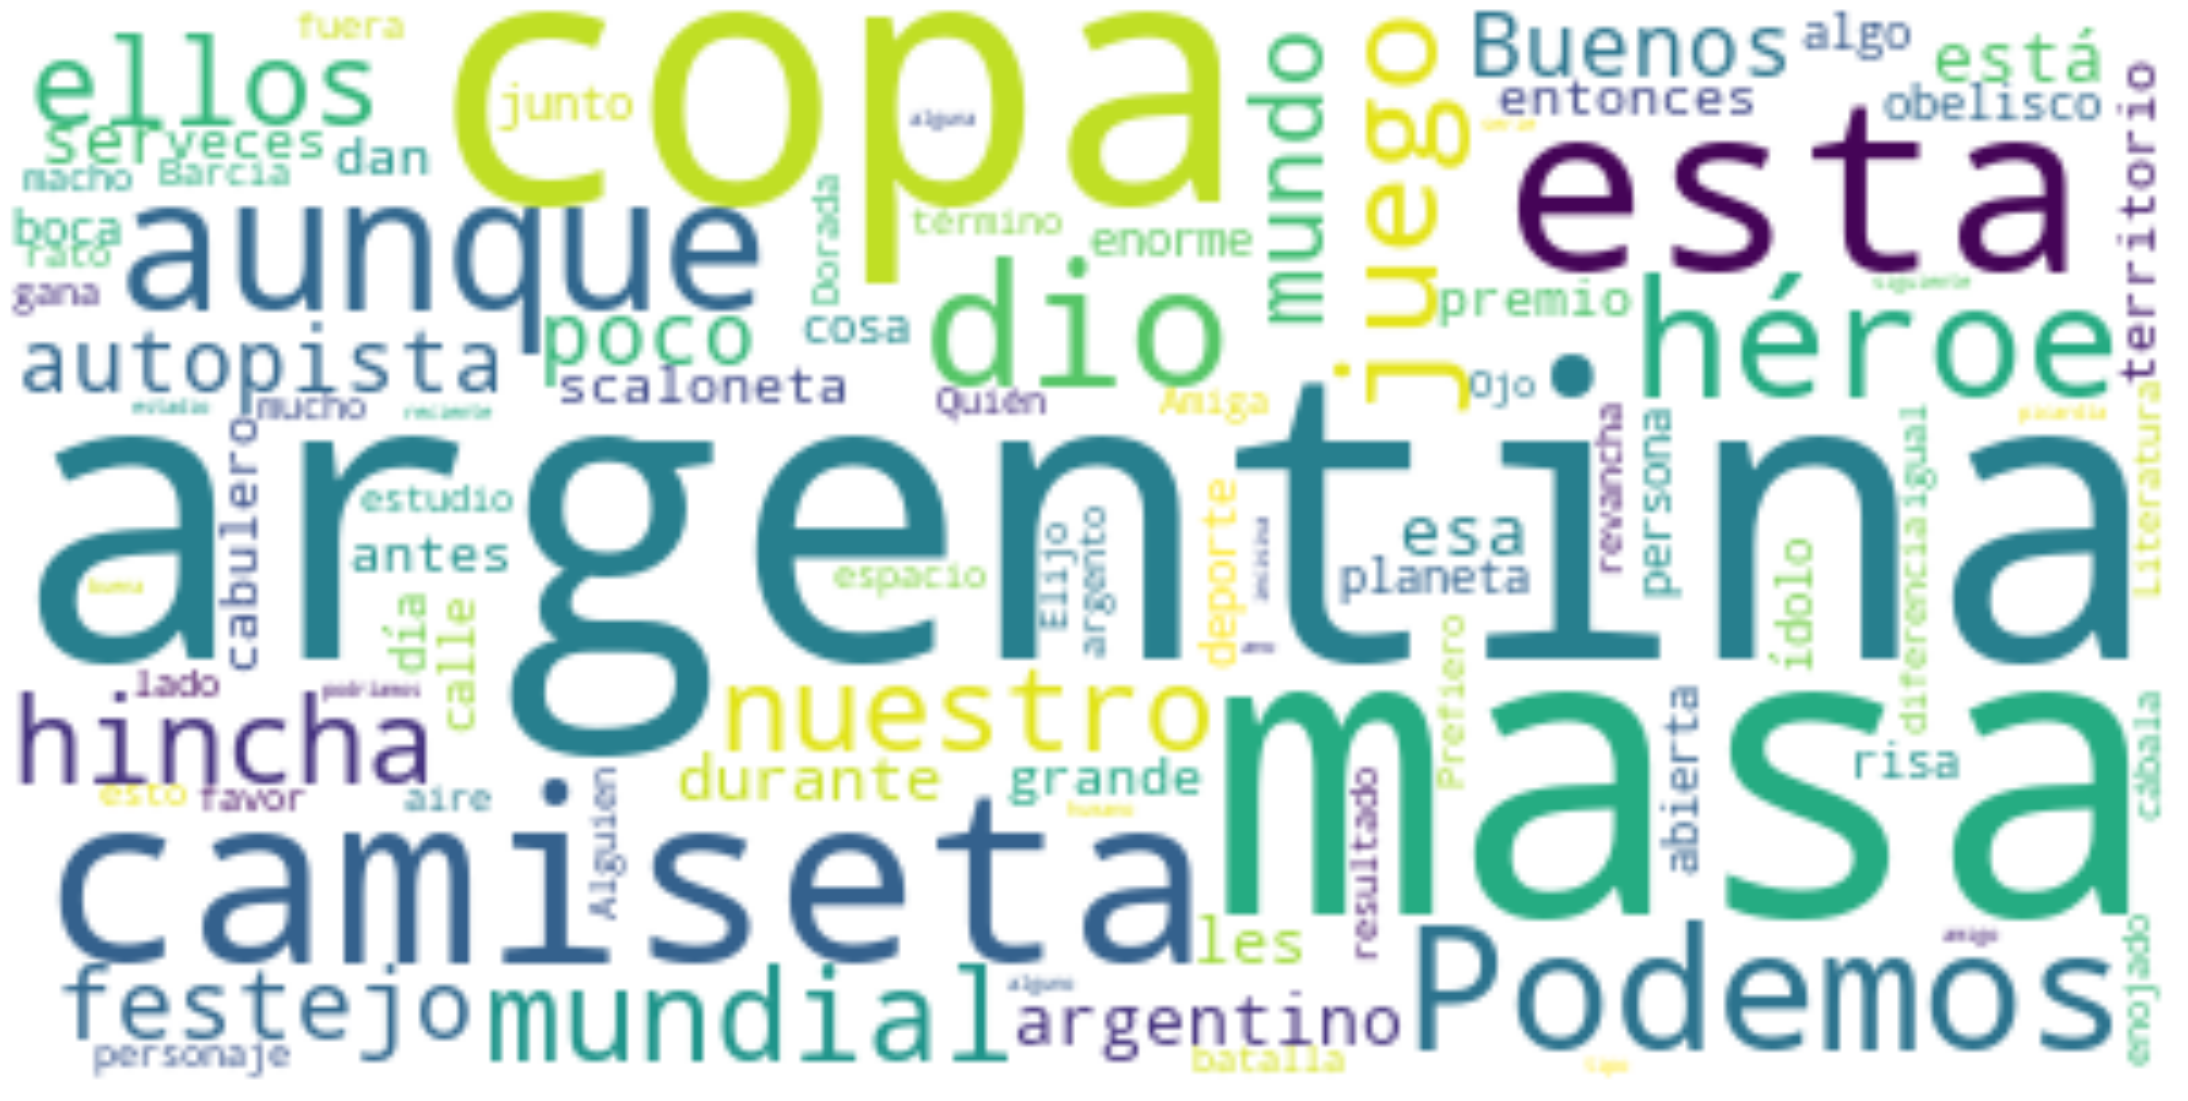

In [ ]:
# Unimos las palabras de la lista en una cadena de caracteres
texto = ' '.join([palabra for palabra, frecuencia in palabras_mas_frecuentes])

# Generamos la nube de palabras a partir de la cadena de caracteres
wordcloud = WordCloud(stopwords=exclusiones).generate(texto)

# Establecemos el color de fondo en blanco
wordcloud.background_color = "white"

# Establecemos una función para determinar el color de cada palabra
def color_func(word, font_size, position, orientation, random_state=None, **kwargs):
    return "hsl(0, 100%%, %d%%)" % randint(80, 200)

wordcloud.color_func = color_func

# Establecemos el tamaño máximo de la fuente en 40
wordcloud.max_font_size = 50

#Tamaño del grafico
plt.figure(figsize=(100,20))

# Mostramos la nube de palabras
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

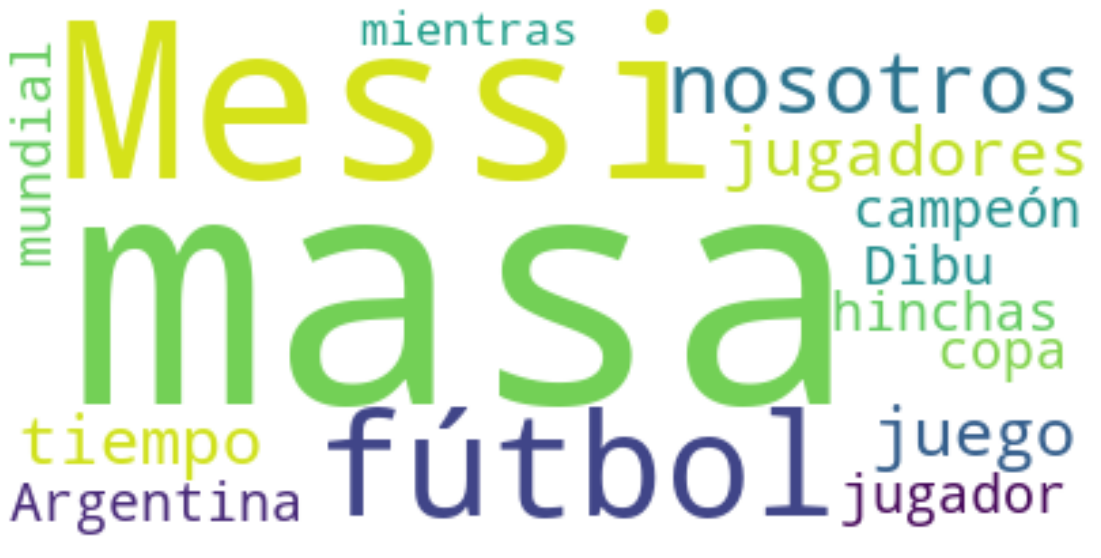

In [ ]:
# Unimos las palabras de la lista en una cadena de caracteres
palabras_mas_frecuentes_16 = palabras_mas_frecuentes[:16]
texto = ' '.join([palabra for palabra, frecuencia in palabras_mas_frecuentes_16])

# Generamos la nube de palabras a partir de la cadena de caracteres
wordcloud = WordCloud().generate(texto)

# Establecemos el color de fondo en blanco
wordcloud.background_color = "white"

# Establecemos una función para determinar el color de cada palabra
def color_func(word, font_size, position, orientation, random_state=None, **kwargs):
    return "hsl(0, 100%%, %d%%)" % randint(120, 300)

wordcloud.color_func = color_func

# Establecemos el tamaño máximo de la fuente en 40
wordcloud.max_font_size = 40

#Tamaño del grafico
plt.figure(figsize=(50,10))

# Mostramos la nube de palabras
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

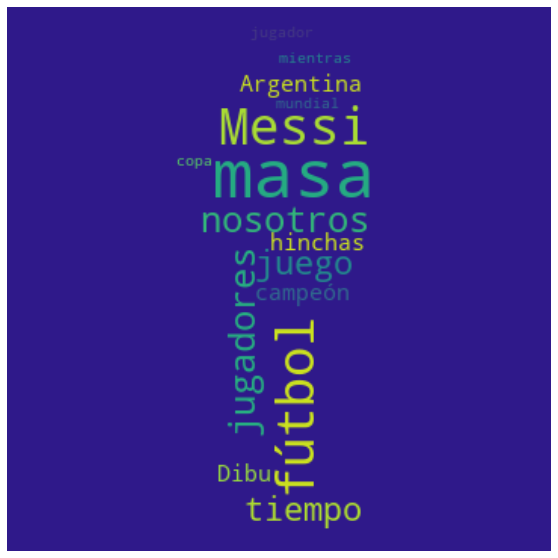

In [ ]:
# Cargamos la imagen de la máscara
mask = plt.imread('/content/drive/MyDrive/Analisis de Textos/Imagenes/copa')

# Generamos la nube de palabras con la máscara
wordcloud = WordCloud(mask=mask).generate(texto)

# Para utilizar la notación hexadecimal para ajustar el color de fondo de la nube de palabras, debes pasar la notación como una cadena de caracteres a la propiedad background_color:
wordcloud.background_color = "#2f198a"

# Establecemos una función para determinar el color de cada palabra
def color_func(word, font_size, position, orientation, random_state=None, **kwargs):
    # Generamos valores aleatorios de tono, saturación y luminosidad
    hue = random.randint(190, 220)
    saturation = random.randint(90, 100)
    lightness = random.randint(80, 100)
    
    # Construimos la cadena de caracteres con la notación de formato
    color = "hsl(%d, %d%%, %d%%)" % (hue, saturation, lightness)
    
    return color

wordcloud.color_func = color_func


# Establecemos el tamaño máximo de la fuente en 40
wordcloud.max_font_size = 40

# Establecemos el tamaño del grafico
plt.figure(figsize=(50,10))

# Mostramos la nube de palabras
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [ ]:
# Obtenemos los bigramas y los filtramos
bigramas = nltk.ngrams(tokens, 2)  # cambiamos a nltk.ngrams() y especificamos que queremos bigramas
stopwords_list = stopwords.words('spanish') # Cargamos la lista de stopwords en memoria y la convertimos a una lista
exclusiones = stopwords_list + ['━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━','A', 'ver','parte','ella', 'ahora', 'hay', 'así', 'No', 'aquel', 'hace','todos','siempre','me','estar','Lo','eso','acá','sí','desde', 'hacia', 'somos', 'mismo','era','cuando','cada','también','tanto','bajo','sino','qué','dice','luego','si','donde','ya','Otro','otro','uno','Los','te','sin','los','son','ante', 'tan', 'solo', '.',',','de', 'el','la', 'porque', 'En','en', 'hasta','La', 'Sus', 'sus','nos', 'y', 'las', ':', 'como', 'con', ';', 'se','”','“','no', 'un', 'los','del', 'a','que','en', 'El', 'le', '(', ')', 'Y', 'para', 'al', 'su', 'más', '?', 'lo', 'una', 'es', 'por', 'fue', 'sobre', 'todo','pero','o', 'tambien']
bigramas_filtrados = [bigrama for bigrama in bigramas if bigrama[0] not in exclusiones and bigrama[1] not in exclusiones]

In [ ]:
# Calculamos la frecuencia de los bigramas y obtenemos las expresiones más frecuentes
frecuencia_bigramas = nltk.FreqDist(bigramas_filtrados)
expresiones_mas_frecuentes = frecuencia_bigramas.most_common()
n = 30
for expresión, frecuencia in expresiones_mas_frecuentes[:n]:
    print(f'{expresión}: {frecuencia}')

('9', 'Julio'): 3
('Buenos', 'Aires'): 3
('tiempo', 'mítico'): 3
('potrero', 'tomado'): 2
('tomado', 'masas'): 2
('fiesta', 'grande'): 2
('Julio', 'autopista'): 2
('autopista', 'Riccheri'): 2
('calles', 'Buenos'): 2
('shock', 'inédito'): 2
('inédito', 'delirio'): 2
('delirio', 'habitando'): 2
('habitando', 'territorio'): 2
('mítico', 'irreal'): 2
('Cada', 'cabulero'): 2
('cabulero', 'cumplió'): 2
('cumplió', 'deber'): 2
('recibió', 'premio'): 2
('Dios', 'ausente'): 2
('ausente', 'aviso'): 2
('recorrido', 'fieles'): 2
('paradoja', 'argenta'): 2
('argenta', 'impidieron'): 2
('impidieron', 'paso'): 2
('paso', 'desearlo'): 2
('desearlo', 'arrebataron'): 2
('arrebataron', 'íntegro'): 2
('íntegro', 'ritual'): 2
('ritual', 'opuesto'): 2
('opuesto', 'velar'): 2


In [ ]:
# Usamos CountVectorizer para crear una matriz de términos
textos = [texto]
vectorizer = CountVectorizer(ngram_range=(2,3), stop_words=exclusiones)
X = vectorizer.fit_transform(textos)
print(X.toarray())

# Imprimimos los nombres de las características (bigramas y trigramas)
print(vectorizer.get_feature_names())

[[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]]
['argentina campeón', 'argentina campeón masa', 'campeón masa', 'campeón masa dibu', 'copa mundial', 'copa mundial mientras', 'dibu hinchas', 'dibu hinchas jugador', 'fútbol jugadores', 'fútbol jugadores tiempo', 'hinchas jugador', 'hinchas jugador masas', 'juego argentina', 'juego argentina campeón', 'jugador masas', 'jugador masas copa', 'jugadores tiempo', 'jugadores tiempo juego', 'masa dibu', 'masa dibu hinchas', 'masas copa', 'masas copa mundial', 'messi fútbol', 'messi fútbol jugadores', 'mundial mientras', 'tiempo juego', 'tiempo juego argentina']


In [ ]:
# Creamos un dataframe y graficamos los n-gramas más frecuentes
df = pd.DataFrame(X.sum(axis=0).T,
                  index=vectorizer.get_feature_names(),
                  columns=['freq'])

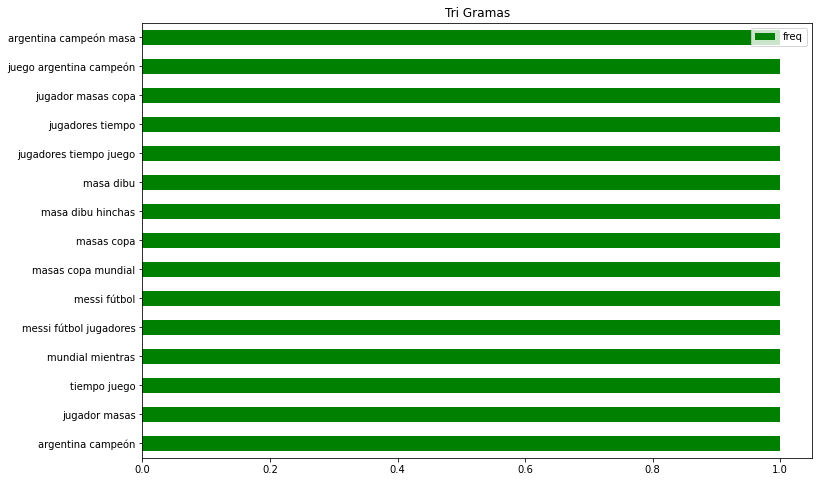

In [ ]:
df.sort_values(by='freq', ascending=False)[:15].plot(kind='barh', title='Tri Gramas', color='green', figsize=(12, 8))
plt.show()

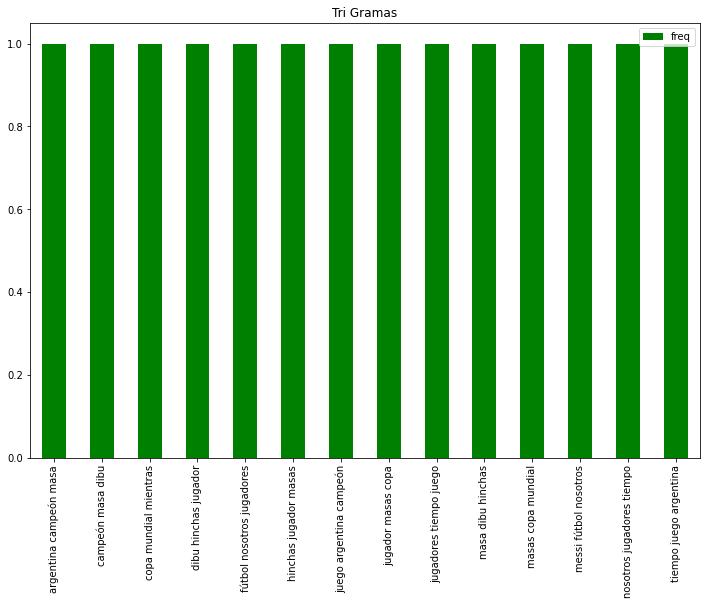

In [ ]:
df.sort_values(by='freq', ascending=False)[:15].plot(kind='bar', title='Tri Gramas', color='green', figsize=(12, 8))
plt.show()

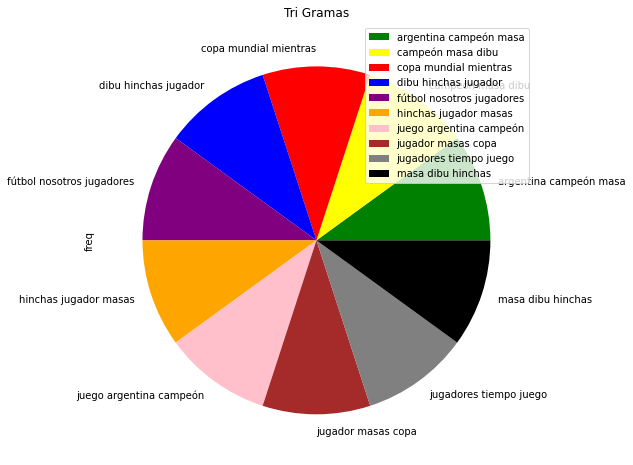

In [ ]:
df.sort_values(by='freq', ascending=False)[:10].plot(kind='pie', y='freq', title='Tri Gramas', colors=['green', 'yellow', 'red', 'blue', 'purple', 'orange', 'pink', 'brown', 'gray', 'black'], figsize=(20, 8))
plt.show()

# Procesamento archivos ePub

Para textos en español

In [ ]:
!pip install EbookLib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 115 kB 15.0 MB/s 
  Created wheel for EbookLib: filename=EbookLib-0.18-py3-none-any.whl size=38791 sha256=5ecf776516023931684aa09457ed038b7664b2d65fa3880dc09bfa2a1867f961
  Stored in directory: /root/.cache/pip/wheels/6d/c5/f9/c615f68c24f539a89184ea938cd630d5973d582af6ced69140
Successfully built EbookLib


In [ ]:
stopwords = nltk.corpus.stopwords.words('spanish')
nlp = spacy.load('es_dep_news_trf')

In [ ]:
import ebooklib.epub
import html.parser

In [ ]:
def epub_text(filepath):
  # Abrimos el archivo EPUB
  book = ebooklib.epub.read_epub(filepath)

  # Leemos el contenido del libro EPUB
  text_epub = ""
  for item in book.get_items():
    if item.get_type() == ebooklib.ITEM_DOCUMENT:
      soup = BeautifulSoup(item.get_body_content(), "html.parser")
      text_epub += soup.get_text()
  return text_epub

In [ ]:
def limpiar_texto(text_epub):
    puntuación = r'[,;.:¡!¿?@#$%&[\](){}<>~=+\-*/|\\_^`"\']'
    
    # signos de puntuación
    text_epub = re.sub(puntuación, ' ', text_epub)
    
    # dígitos [0-9]
    text_epub = re.sub('\d', ' ', text_epub)

    return text_epub

In [ ]:
# Aplicamos el código al archivo EPUB
text_epub = epub_text('/content/drive/MyDrive/Libros/Adolfo Bioy Casares/Borges (160)/Borges - Adolfo Bioy Casares.epub')

/usr/local/lib/python3.8/dist-packages/ebooklib/epub.py:1395: UserWarning: In the future version we will turn default option ignore_ncx to True.
  warnings.warn('In the future version we will turn default option ignore_ncx to True.')


In [ ]:
# Tokenizamos el texto
tokens_epub = nltk.word_tokenize(text_epub)

In [ ]:
# Tokenizamos el texto y filtramos las palabras
tokens_epub = nltk.word_tokenize(text_epub)
exclusiones_epub = [">", ",", ".", ";", "&", "#", "13", "''", ":", "p", "/p", "«", "»", "i", "/i", "small", "/small", "class", "[", "]", "B", ")", "(", "..", "href", "/a", "sup", "/sup", "id=", "lt", "ORGES", "?", "b", "/b", "div", "/div", "salto25", "La", "nota", "El", "/Text/notas.xhtml", "No", "En", "A", "Come", "Es", "Me", "Los", "gente", "Qué", "cuento", "Por", "of", "’", "Cuando", "De", "hombre", "Si", "Le", "the", "Un", "vida", "Se", "Después", "Lo", "frase", "!", "…", "Con", "The", "Y", "sé", "mundo", "Lunes", "Miércoles", "<", "a", "actualmente", "adelante", "además", "afirmó", "agregó", "ahora", "ahí", "al", "algo", "alguna", "algunas", "alguno", "algunos", "algún", "alrededor", "ambos", "ampleamos", "ante", "anterior", "antes", "apenas", "aproximadamente", "aquel", "aquellas", "aquellos", "aqui", "aquí", "arriba", "aseguró", "así", "atras", "aunque", "ayer", "añadió", "aún", "bajo", "bastante", "bien", "buen", "buena", "buenas", "bueno", "buenos", "cada", "casi", "cerca", "cierta", "ciertas", "cierto", "ciertos", "cinco", "comentó", "como", "con", "conocer", "conseguimos", "conseguir", "considera", "consideró", "consigo", "consigue", "consiguen", "de", "que", "la", "en", "y", "el", "un", "no", "los", "se", "una", "es", "del", "lo", "por", "para", "las", "su", "le", "me", "“", "”", "más", "o", "pero", "muy", "si", "porque", "sobre", "dice", "era", "está", "uno", "todo", "qué", "son", "sus", "él", "hay", "vez", "dijo", "ser","cuando", "había", "tiene", "nada", "después", "dos", "nos", "parece", "tan", "mejor", "ha", "Dice", "poco", "ese", "otro", "eso", "fue", "puede", "entre", "ni", "otros", "todos", "mucho", "también", "tal", "esa", "ya", "este", "cuenta", "mal", "versos", "va", "años", "estaba", "creo", "mismo", "te", "Domingo", "siempre", "otra","menos", "gran", "decir", "habla", "les", "mí", "esta", "cosas", "contra", "ella", "sabe", "donde", "mujer", "Martes", "Viernes", "Leemos", "palabras", "escritores", "obra", "palabra","hace", "Las", "Para", "Una", "hubiera", "Pero", "Hablamos", "tenía", "están", "Comen", "sólo", "Como", "tiempo", "nadie", "nunca", "hasta", "día", "hacer", "quiere", "/", "sea", "cómo", "sino", "Escr", "esto", "¿Qué", "claro", "idea", "señor", "toda", "días", "escrito", "personas", "veces", "¿Por", "Bueno", "quien", "esos", "debe", "persona", "hoy", "desde", "hablar", "raro", "decía", "unos", "tres", "Hay", "eran", "sí", "¿Cómo", "da", "modo", "digo", "ellos", "and", "hecho", "Está", "país", "Tal"]
palabras_filtradas_epub = [palabra for palabra in tokens_epub if palabra not in exclusiones_epub]

In [ ]:
# Calculamos la frecuencia de las palabras
frecuencia = nltk.FreqDist(palabras_filtradas_epub)

# Obtenemos las 25 palabras más frecuentes
palabras_mas_frecuentes = frecuencia.most_common(100)

# Imprimimos las palabras y sus frecuencias
print("Las 100 palabras más frecuentes son:")
for palabra, frecuencia in palabras_mas_frecuentes:
    print(f'{palabra}: {frecuencia}')


In [ ]:
# Obtenemos los bigramas y los filtramos
bigramas_epub = nltk.bigrams(tokens_epub)
exclusiones_epub_bigramas = [">", ",", ':',".", ";", "&", "#", "13", "''", ":", "p", "/p", "«", "»", "i", "/i", "small", "/small", "class", "[", "]", "B", ")", "(", "..", "href", "/a", "sup", "/sup", "id=", "lt", "ORGES", "?", "b", "/b", "div", "/div", "salto25", "La", "nota", "El", "/Text/notas.xhtml", "No", "En", "A", "Come", "Es", "Me", "Los", "gente", "Qué", "cuento", "Por", "of", "’", "Cuando", "De", "hombre", "Si", "Le", "the", "Un", "vida", "Se", "Después", "Lo", "frase", "!", "…", "Con", "The", "Y", "sé", "mundo", "Lunes", "Miércoles", "<", "a", "actualmente", "adelante", "además", "afirmó", "agregó", "ahora", "ahí", "al", "algo", "alguna", "algunas", "alguno", "algunos", "algún", "alrededor", "ambos", "ampleamos", "ante", "anterior", "antes", "apenas", "aproximadamente", "aquel", "aquellas", "aquellos", "aqui", "aquí", "arriba", "aseguró", "así", "atras", "aunque", "ayer", "añadió", "aún", "bajo", "bastante", "bien", "buen", "buena", "buenas", "bueno", "buenos", "cada", "casi", "cerca", "cierta", "ciertas", "cierto", "ciertos", "cinco", "comentó", "como", "con", "conocer", "conseguimos", "conseguir", "considera", "consideró", "consigo", "consigue", "consiguen", "de", "que", "la", "en", "y", "el", "un", "no", "los", "se", "una", "es", "del", "lo", "por", "para", "las", "su", "le", "me", "“", "”", "más", "o", "pero", "muy", "si", "porque", "sobre", "dice", "era", "está", "uno", "todo", "qué", "son", "sus", "él", "hay", "vez", "dijo", "ser","cuando", "había", "tiene", "nada", "después", "dos", "nos", "parece", "tan", "mejor", "ha", "Dice", "poco", "ese", "otro", "eso", "fue", "puede", "entre", "ni", "otros", "todos", "mucho", "también", "tal", "esa", "ya", "este", "cuenta", "mal", "versos", "va", "años", "estaba", "creo", "mismo", "te", "Domingo", "siempre", "otra","menos", "gran", "decir", "habla", "les", "mí", "esta", "cosas", "contra", "ella", "sabe", "donde", "mujer", "Martes", "Viernes", "Leemos", "palabras", "escritores", "obra", "palabra","hace", "Las", "Para", "Una", "hubiera", "Pero", "Hablamos", "tenía", "están", "Comen", "sólo", "Como", "tiempo", "nadie", "nunca", "hasta", "día", "hacer", "quiere", "/", "sea", "cómo", "sino", "Escr", "esto", "¿Qué", "claro", "idea", "señor", "toda", "días", "escrito", "personas", "veces", "¿Por", "Bueno", "quien", "esos", "debe", "persona", "hoy", "desde", "hablar", "raro", "decía", "unos", "tres", "Hay", "eran", "sí", "¿Cómo", "da", "modo", "digo", "ellos", "and", "hecho", "Está", "país", "Tal"]
bigramas_filtrados_epub = [bigrama for bigrama in bigramas_epub if bigrama[0] not in exclusiones_epub_bigramas and bigrama[1] not in exclusiones_epub_bigramas]

In [ ]:
# Calculamos la frecuencia de los bigramas y obtenemos la expresión más frecuente
frecuencia_bigramas_epub = nltk.FreqDist(bigramas_filtrados_epub)
expresion_mas_frecuente_epub = frecuencia_bigramas_epub.max()
print(f'La expresión más frecuente es "{expresion_mas_frecuente_epub}"')

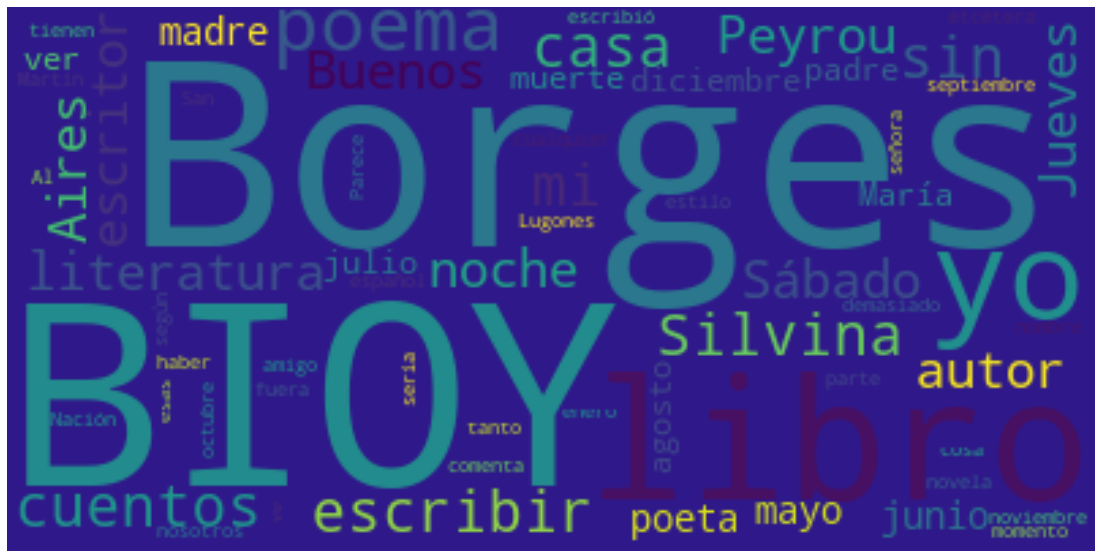

In [ ]:
# Unimos las palabras de la lista en una cadena de caracteres
palabras_mas_frecuentes_100 = palabras_mas_frecuentes[:70]
text_epub = ' '.join([palabra for palabra, frecuencia in palabras_mas_frecuentes_100])

# Generamos la nube de palabras a partir de la cadena de caracteres
wordcloud = WordCloud().generate(text_epub)

# Establecemos el color de fondo en blanco
# wordcloud.background_color = "white"
wordcloud.background_color = "#2f198a"


# Establecemos una función para determinar el color de cada palabra
def color_func(word, font_size, position, orientation, random_state=None, **kwargs):
  return "hsl(0, 100%%, %d%%)" % randint(20, 360)

wordcloud.color_func = color_func

# Establecemos el tamaño máximo de la fuente en 40
wordcloud.max_font_size = 40

#Tamaño del gráfico
plt.figure(figsize=(50,10))

# Mostramos la nube de palabras
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

Version para textos en ingles

In [ ]:
stopwords = nltk.corpus.stopwords.words('english')
nlp = spacy.load('en_core_web_trf')

In [ ]:
def epub_text(filepath):
  text_epub = ""
  try:
    # Abrimos el archivo EPUB
    book = ebooklib.epub.read_epub(filepath)

    # Leemos el contenido del libro EPUB
    for item in book.get_items():
      if item.get_type() == ebooklib.ITEM_DOCUMENT:
        try:
          soup = BeautifulSoup(item.get_body_content(), "html.parser")
          text_epub += soup.get_text()
        except Exception as e:
          print(f'Error inesperado al leer el contenido del archivo EPUB: {e}')
  except OSError as e:
    print(f'Error al abrir el archivo EPUB: {e}')
  except Exception as e:
    print(f'Error inesperado al abrir el archivo EPUB: {e}')

  return text_epub

def limpiar_texto(text_epub):
  puntuación = r'[,;.:¡!¿?@#$%&[\](){}<>~=+\-*/|\\_^`"\']'
    
  # signos de puntuación
  text_epub = re.sub(puntuación, ' ', text_epub)
    
  # dígitos [0-9]
  text_epub = re.sub('\d', ' ', text_epub)

  stopwords = nltk.corpus.stopwords.words('english') + [ "’", "‘", "a",  "an",  "and",  "are",  "as",  "at",  "be",  "by",  "but",  "can",  "do",  "for",  "from",  "has",  "have",  "he",  "his",  "if",  "in",  "is",  "it",  "its",  "of",  "on",  "or",  "that",  "the",  "this",  "to",  "up",  "was",  "we",  "with", ".",  ",",  ";",  ":",  "!",  "?",  "@",  "#",  "$",  "%",  "&",  "[",  "]",  "(",  ")",  "{",  "}",  "<",  ">",  "~",  "=",  "+",  "-",  "*",  "/",  "|",  "\\",  "_",  "^",  "`",  "\"",  "'", '’', '–', '‘', 'The', 'In', 'It', 'A', 'New', 'http', 'www', 'n', 'I', 'If', 'We', 'They', 'As', 'I', 'For', ':', ',', '.']

  text = [word for word in text_epub.split() if word not in stopwords]

  # Eliminamos los números del texto
  text = [word for word in text if not word.isdigit()]

  return text

In [ ]:
filepath = '/content/drive/MyDrive/Analisis de Textos/The Content Machine - Michael Bhaskar.epub'
text_epub = epub_text(filepath)
text = limpiar_texto(text_epub)

In [ ]:
  # Tokenizamos el texto y filtramos las palabras
  tokens_epub = nltk.word_tokenize(' '.join(text))
  exclusiones_epub = stopwords + [ "’", "‘", "a",  "an",  "and",  "are",  "as",  "at",  "be",  "by",  "but",  "can",  "do",  "for",  "from",  "has",  "have",  "he",  "his",  "if",  "in",  "is",  "it",  "its",  "of",  "on",  "or",  "that",  "the",  "this",  "to",  "up",  "was",  "we",  "with", ".",  ",",  ";",  ":",  "!",  "?",  "@",  "#",  "$",  "%",  "&",  "[",  "]",  "(",  ")",  "{",  "}",  "<",  ">",  "~",  "=",  "+",  "-",  "*",  "/",  "|",  "\\",  "_",  "^",  "`",  "\"",  "'", '’', '–', '‘', 'The', 'In', 'It', 'A', 'New', 'http', 'www', 'n', 'I', 'If', 'We', 'They', 'As', 'I', 'For', ':', ',', '.', 'like', 'models', 'media', 'books', 'new', 'Publishing', 'work', 'publisher', 'technology', 'accessed', 'Online', 'business', 'public', 'print', 'Press', 'century', 'amplification', 'printing', 'University', 'theory', 'history', 'London', 'cultural', 'production', 'time', 'market', 'industry', 'network', 'Internet', 'published', 'system', 'distribution', 'Cambridge', 'copyright', 'frames', 'Publishers', 'Book', 'text', 'web', 'filtering', 'press', 'open', 'change', 'well', 'frame', 'form', 'Books', 'social', 'product', 'years', 'York']
  palabras_filtradas_epub = [palabra for palabra in tokens_epub if palabra not in exclusiones_epub]

  # Calculamos la frecuencia de las palabras
  frecuencia = nltk.FreqDist(palabras_filtradas_epub)

  # Obtenemos las 25 palabras más frecuentes
  palabras_mas_frecuentes = frecuencia.most_common(50)

  # Imprimimos las palabras y sus frecuencias
  print("Las 50 palabras más frecuentes son:")
  for palabra, frecuencia in palabras_mas_frecuentes:
    print(f'{palabra}: {frecuencia}')

Las 50 palabras más frecuentes son:
publishing: 889
content: 353
publishers: 302
book: 227
digital: 222
one: 189
value: 130
also: 129
model: 128
This: 122
would: 107
first: 101
many: 100
part: 97
even: 95
way: 93
com: 88
works: 87
making: 87
much: 83
still: 82
see: 82
example: 80
world: 78
need: 78
process: 75
sense: 71
means: 70
always: 66
something: 62
may: 60
different: 60
around: 59
make: 59
framing: 59
profit: 57
two: 53
often: 53
There: 52
made: 52
forms: 52
could: 52
without: 51
What: 51
long: 51
might: 51
us: 51
terms: 51
never: 50
publish: 50


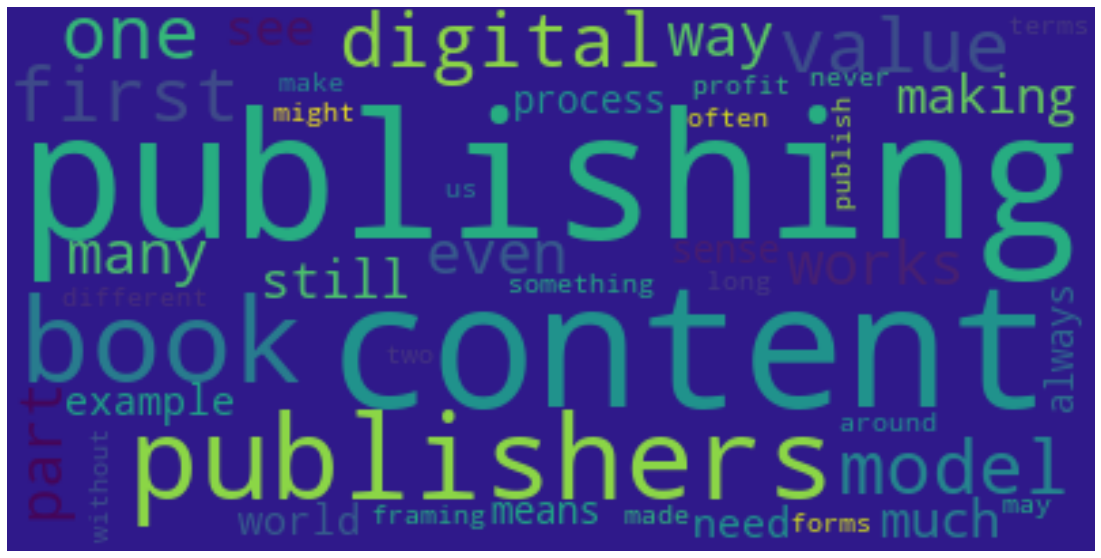

In [ ]:
# Unimos las palabras de la lista en una cadena de caracteres
palabras_mas_frecuentes = palabras_mas_frecuentes[:70]
text_epub = ' '.join([palabra for palabra, frecuencia in palabras_mas_frecuentes])

# Generamos la nube de palabras a partir de la cadena de caracteres
wordcloud = WordCloud().generate(text_epub)

# Establecemos el color de fondo en blanco
# wordcloud.background_color = "white"
wordcloud.background_color = "#2f198a"


# Establecemos una función para determinar el color de cada palabra
def color_func(word, font_size, position, orientation, random_state=None, **kwargs):
  return "hsl(0, 100%%, %d%%)" % randint(20, 360)

wordcloud.color_func = color_func

# Establecemos el tamaño máximo de la fuente en 40
wordcloud.max_font_size = 40

#Tamaño del gráfico
plt.figure(figsize=(50,10))

# Mostramos la nube de palabras
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [ ]:
# Obtenemos los bigramas y los filtramos
bigramas_epub = nltk.bigrams(tokens_epub)
exclusiones_epub_bigramas = [ "’", "‘", "a",  "an",  "and",  "are",  "as",  "at",  "be",  "by",  "but",  "can",  "do",  "for",  "from",  "has",  "have",  "he",  "his",  "if",  "in",  "is",  "it",  "its",  "of",  "on",  "or",  "that",  "the",  "this",  "to",  "up",  "was",  "we",  "with", ".",  ",",  ";",  ":",  "!",  "?",  "@",  "#",  "$",  "%",  "&",  "[",  "]",  "(",  ")",  "{",  "}",  "<",  ">",  "~",  "=",  "+",  "-",  "*",  "/",  "|",  "\\",  "_",  "^",  "`",  "\"",  "'", '’', '–', '‘', 'The', 'In', 'It', 'A', 'New', 'http', 'www', 'n', 'I', 'If', 'We', 'They', 'As', 'I', 'For', ':', ',', '.']
bigramas_filtrados_epub = [bigrama for bigrama in bigramas_epub if bigrama[0] not in exclusiones_epub_bigramas and bigrama[1] not in exclusiones_epub_bigramas]

In [ ]:
# Calculamos la frecuencia de los bigramas
frecuencia_bigramas_epub = nltk.FreqDist(bigramas_filtrados_epub)

# Obtenemos las 10 expresiones más frecuentes y sus frecuencias
expresiones_mas_frecuentes_epub = frecuencia_bigramas_epub.most_common(50)

# Imprimimos las expresiones y sus frecuencias
print("Las 50 expresiones más frecuentes son:")
for expresion, frecuencia in expresiones_mas_frecuentes_epub:
  print(f'{expresion}: {frecuencia}')


Las 50 expresiones más frecuentes son:
('University', 'Press'): 54
('book', 'publishing'): 31
('accessed', 'January'): 28
('Cambridge', 'University'): 26
('theory', 'publishing'): 25
('digital', 'technology'): 25
('intellectual', 'property'): 22
('value', 'chain'): 21
('print', 'runs'): 21
('First', 'Folio'): 21
('business', 'model'): 20
('Cambridge', 'Cambridge'): 20
('January', 'Online'): 20
('digital', 'publishing'): 19
('nineteenth', 'century'): 19
('market', 'making'): 18
('twentieth', 'century'): 18
('html', 'accessed'): 18
('eighteenth', 'century'): 17
('filtering', 'amplification'): 17
('per', 'cent'): 17
('book', 'publishers'): 16
('first', 'place'): 15
('public', 'sphere'): 15
('accessed', 'December'): 15
('co', 'uk'): 15
('publishing', 'history'): 14
('digital', 'challenge'): 14
('York', 'Times'): 14
('framing', 'amplification'): 14
('accessed', 'February'): 14
('making', 'public'): 13
('Abingdon', 'Routledge'): 13
('publishing', 'must'): 12
('fifteenth', 'century'): 12
('Op

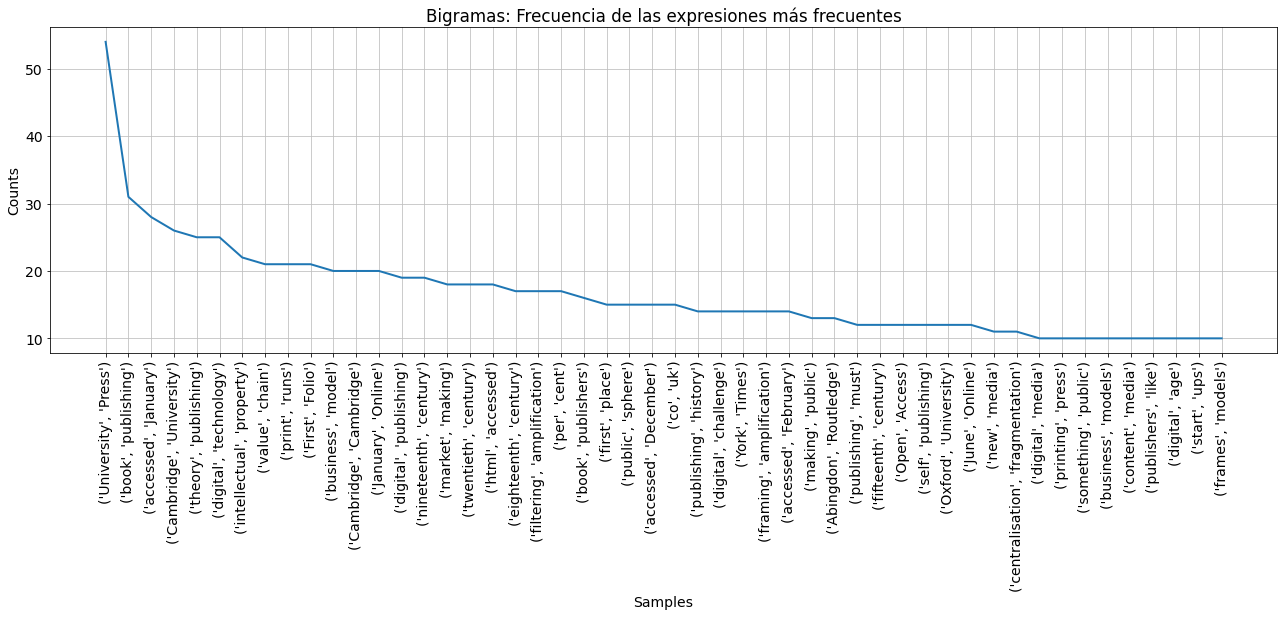

In [ ]:
# Creamos un objeto Figure de matplotlib
fig = plt.figure(figsize=(22, 6))

# Cambiamos el tamaño de las fuentes
plt.rcParams.update({'font.size': 14})

# Generamos una gráfica de barras de la frecuencia de las expresiones más frecuentes
frecuencia_bigramas_epub.plot(50, title='Bigramas: Frecuencia de las expresiones más frecuentes')

# Mostramos el grafico
plt.show()

In [ ]:
trigramas_epub = nltk.ngrams(tokens_epub, 3)
exclusiones_epub_trigramas = [ "’", "‘", "a",  "an",  "and",  "are",  "as",  "at",  "be",  "by",  "but",  "can",  "do",  "for",  "from",  "has",  "have",  "he",  "his",  "if",  "in",  "is",  "it",  "its",  "of",  "on",  "or",  "that",  "the",  "this",  "to",  "up",  "was",  "we",  "with", ".",  ",",  ";",  ":",  "!",  "?",  "@",  "#",  "$",  "%",  "&",  "[",  "]",  "(",  ")",  "{",  "}",  "<",  ">",  "~",  "=",  "+",  "-",  "*",  "/",  "|",  "\\",  "_",  "^",  "`",  "\"",  "'", '’', '–', '‘', 'The', 'In', 'It', 'A', 'New', 'http', 'www', 'n', 'I', 'If', 'We', 'They', 'As', 'I', 'For', ':', ',', '.']
trigramas_filtrados_epub = [trigrama for trigrama in trigramas_epub if trigrama[0] not in exclusiones_epub_trigramas and trigrama[1] not in exclusiones_epub_trigramas and trigrama[2] not in exclusiones_epub_trigramas]

In [ ]:
trigramas_epub = nltk.ngrams(tokens_epub, 3)
exclusiones_epub_trigramas = [ "’",]
trigramas_filtrados_epub = [trigrama for trigrama in trigramas_epub if trigrama[0] not in exclusiones_epub_trigramas and trigrama[1] not in exclusiones_epub_trigramas and trigrama[2] not in exclusiones_epub_trigramas]

# Obtenemos los trigramas a partir del texto limpio
trigramas_filtrados_epub = nltk.ngrams(text, 3)

# Calculamos la frecuencia de los trigramas
frecuencia_trigramas_epub = nltk.FreqDist(trigramas_filtrados_epub)

# Obtenemos las 50 expresiones más frecuentes y sus frecuencias
expresiones_mas_frecuentes_epub = frecuencia_trigramas_epub.most_common(50)

# Imprimimos las expresiones y sus frecuencias
print("Las 50 expresiones más frecuentes son:")
for expresion, frecuencia in expresiones_mas_frecuentes_epub:
  print(f'{expresion}: {frecuencia}')

Las 50 expresiones más frecuentes son:
('Cambridge', 'University', 'Press'): 26
('Cambridge', 'Cambridge', 'University'): 20
('Oxford', 'University', 'Press'): 12
('html', 'accessed', 'January'): 10
('Adriaan', 'van', 'der'): 8
('Chicago', 'University', 'Chicago'): 8
('University', 'Chicago', 'Press'): 8
('Online', 'nytimes', 'com'): 8
('Online', 'guardian', 'co'): 8
('guardian', 'co', 'uk'): 8
('van', 'der', 'Weel'): 6
('twenty', 'first', 'century'): 6
('London', 'Sage', 'Publications'): 6
('Oxford', 'Oxford', 'University'): 6
('ed', 'Abingdon', 'Routledge'): 5
('Yale', 'University', 'Press'): 5
('Publishing', 'Research', 'Quarterly'): 5
('Frankfurt', 'Book', 'Fair'): 4
('Penguin', 'Random', 'House'): 4
('unified', 'field', 'theory'): 4
('Oxford', 'English', 'Dictionary'): 4
('mid', 'twentieth', 'century'): 4
('Kindle', 'Direct', 'Publishing'): 4
('Routledge', 'Railway', 'Library'): 4
('W', 'H', 'Smith'): 4
('rational', 'choice', 'theory'): 4
('co', 'uk', 'books'): 4
('William', 'St',

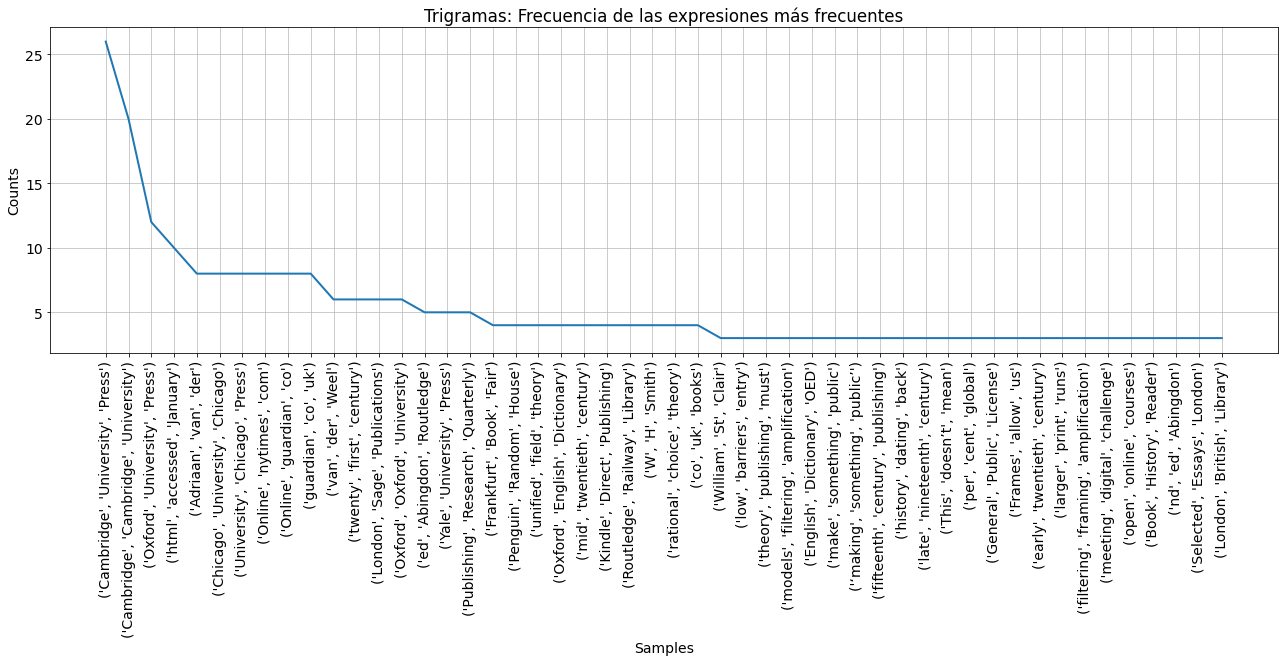

In [ ]:
# Creamos un objeto Figure de matplotlib
fig = plt.figure(figsize=(22, 6))

# Cambiamos el tamaño de las fuentes
plt.rcParams.update({'font.size': 14})

# Generamos una gráfica de barras de la frecuencia de las expresiones más frecuentes
frecuencia_trigramas_epub.plot(50, title='Trigramas: Frecuencia de las expresiones más frecuentes')

# Mostramos el grafico
plt.show()

# Resumen con 'gensim'

In [ ]:
!pip install gensim

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# PDF

Carga y procesamiento de archivos pdf

In [ ]:
!pip install pypdf2

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 232 kB 6.5 MB/s 


In [ ]:
nltk.download('stopwords')

In [ ]:
stopwords = nltk.corpus.stopwords.words('spanish', 'english')

In [ ]:
# nlp = spacy.load('es_dep_news_trf')
nlp = spacy.load('en_core_web_trf')

In [ ]:
from PyPDF2 import PdfFileReader

In [ ]:
import PyPDF2
def pdf_text(filepath):
  # Abrimos el archivo PDF
  with open(filepath, 'rb') as f:
    pdf = PyPDF2.PdfReader(f)
    
    # Leemos el contenido del archivo PDF
    text_pdf = ""
    for page in pdf.pages:
     text_pdf += page.extract_text()
  return text_pdf

filepath = "/content/drive/MyDrive/CURSOS/Mios/Nuevas Tecnologias para la Escena CPTI/Materiales/005 - Clase 5/Textos especificos/Putting a Glitch in the Field.pdf"
text = pdf_text(filepath)

In [ ]:
# Separamos el texto en líneas
lines = text.split("\n")

# Seleccionamos las 10 primeras líneas
first_lines = lines[:10]

# Imprimimos las líneas seleccionadas
for line in first_lines:
  print(line)

In [ ]:
import textwrap

In [ ]:
def process_text(text):
  # Dividimos el texto en chunks de tamaño máximo de 1 millón de caracteres
  wrapped_text = textwrap.wrap(text, width=1000000)

  processed_text = []
  
  # Procesamos cada chunk de texto
  for chunk in wrapped_text:
    processed_text.extend(process_chunk(chunk))

  return processed_text

def process_chunk(chunk):
  # Procesamos el chunk de texto utilizando el modelo de PLN
  doc = nlp(chunk)

  # Tokenizamos el texto
  tokens = [token.text for token in doc]

  # Limpiamos el texto
  clean_tokens = [clean_text(token) for token in tokens]

  # Añadimos los tokens limpios al texto procesado
  processed_text = []
  processed_text.extend(clean_tokens)

  return processed_text

def clean_text(text):
  # Eliminamos los caracteres especiales y los signos de puntuación
  text = re.sub(r'[^\w\s]', '', text)

  # Convertimos el texto a minúsculas
  text = text.lower()

  # Eliminamos las palabras que no aportan significado al texto, como "el", "la", "los", "las", etc.
  # stopwords = nltk.corpus.stopwords.words('spanish') + ['el', 'la', 'los', 'las', 'un', 'una', 'unos', 'unas', 'y', 'o', 'a', 'ante', 'bajo', 'cabe', 'con', 'contra', 'de', 'desde', 'en', 'entre', 'hacia', 'hasta', 'para', 'por', 'según', 'sin', 'so', 'sobre', 'tras']
  stopwords = nltk.corpus.stopwords.words('english') + ["the", "of", "and", "to", "in", "as", "is", "it", "on", "that", "are", "for", "with", "by", "from", "at", "this", "such", "its", "but", "not", "an", "or", "be", "what", "one", "their", "these", "which", "between", "how", "york", "have", "into", "more", "also", "we", "bobst", "library", "june", "other", "well" "us", "prior", "while", "indeed", "production", "relations", "might", "they", "cambridge", "itself", "fields", "forms", "themselves", "all", "some", "without", "towards", "p", "putting", "practice", "ideas", "london", "been", "two", "presence", "possible", "most", "case",'i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', 'too', 'very', 's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', 've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn', "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn', "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't"]
  text = [word for word in text.split() if word not in stopwords]

  # Eliminamos los números del texto
  text = [word for word in text if not word.isdigit()]

  return text

In [ ]:
filepath = "/content/drive/MyDrive/CURSOS/Mios/Nuevas Tecnologias para la Escena CPTI/Materiales/005 - Clase 5/Textos especificos/Putting a Glitch in the Field.pdf"
text = pdf_text(filepath)

In [ ]:
processed_text = process_text(text)
print(processed_text[:10])  # Imprime las primeras 10 palabras del texto procesado

In [ ]:
# Unimos los elementos de la lista en una sola cadena de texto
processed_text_str = " ".join(map(str, processed_text))

# Unimos los elementos de la lista en una sola cadena de texto, separando cada elemento con un espacio en blanco
oracion = " ".join(processed_text_str)

# Dividimos el texto en oraciones
sentences = nltk.sent_tokenize(processed_text_str)

# Seleccionamos las 10 primeras oraciones
first_sentences = sentences[:10]

# Imprimimos las primeras 10 oraciones del texto procesado
for sentence in first_sentences:
  print(sentence)

In [ ]:
from itertools import chain

In [ ]:
stopwords = nltk.corpus.stopwords.words('english')
stopwords += ["the", "of", "and", "to", "in", "as", "is", "it", "on", "that", "are", "for", "with", "by", "from", "at", "this", "such", "its", "but", "not", "an", "or", "be", "what", "one", "their", "these", "which", "between", "how", "york", "have", "into", "more", "also", "we", "bobst", "library", "june", "other", "well" "us", "prior", "while", "indeed", "production", "relations", "might", "they", "cambridge", "itself", "fields", "forms", "themselves", "all", "some", "without", "towards", "p", "putting", "practice", "ideas", "london", "been", "two", "presence", "possible", "most", "case",'i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', 'too', 'very', 's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', 've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn', "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn', "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't"]
filtered_tokens = [token for token in processed_text if token not in stopwords]
from itertools import chain
filtered_tokens = list(chain.from_iterable(filtered_tokens))
frecuencia = nltk.FreqDist(filtered_tokens)

# Obtenemos las 25 palabras más frecuentes
palabras_mas_frecuentes = frecuencia.most_common(20)

# Imprimimos las palabras y sus frecuencias
print("Las 20 palabras más frecuentes son:")
for palabra, frecuencia in palabras_mas_frecuentes:
    print(f'{palabra}: {frecuencia}')

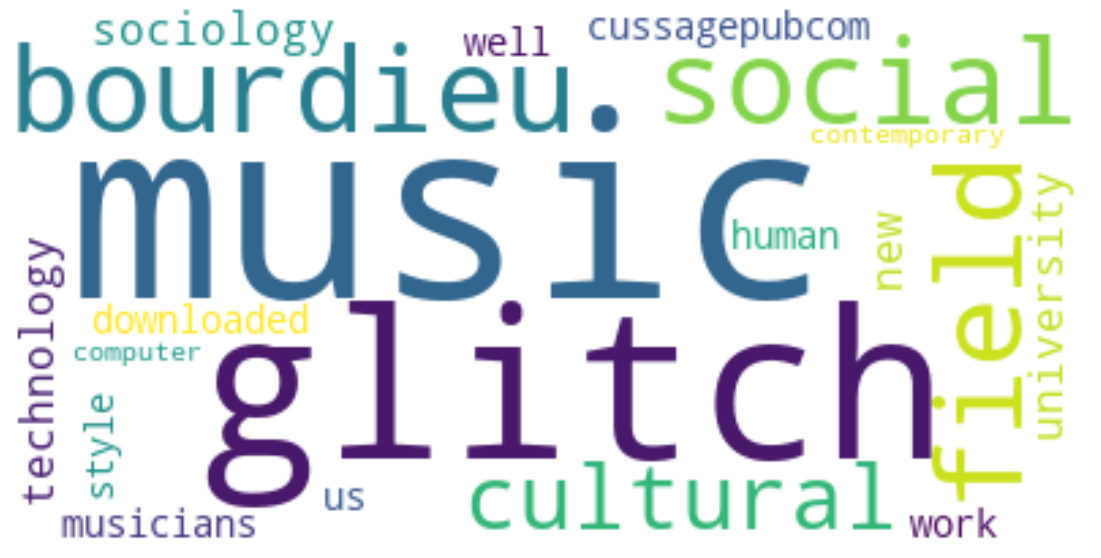

In [ ]:
# Unimos las palabras de la lista en una cadena de caracteres
texto = ' '.join([palabra for palabra, frecuencia in palabras_mas_frecuentes])

# Generamos la nube de palabras a partir de la cadena de caracteres
wordcloud = WordCloud().generate(texto)

# Establecemos el color de fondo en blanco
wordcloud.background_color = "white"

# Establecemos una función para determinar el color de cada palabra
def color_func(word, font_size, position, orientation, random_state=None, **kwargs):
    return "hsl(0, 100%%, %d%%)" % randint(120, 300)

wordcloud.color_func = color_func

# Establecemos el tamaño máximo de la fuente en 40
wordcloud.max_font_size = 40

#Tamaño del grafico
plt.figure(figsize=(50,10))

# Mostramos la nube de palabras
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [ ]:
# Creamos dos listas con las palabras y sus frecuencias
palabras = [palabra for palabra, frecuencia in palabras_mas_frecuentes]
frecuencias = [frecuencia for palabra, frecuencia in palabras_mas_frecuentes]

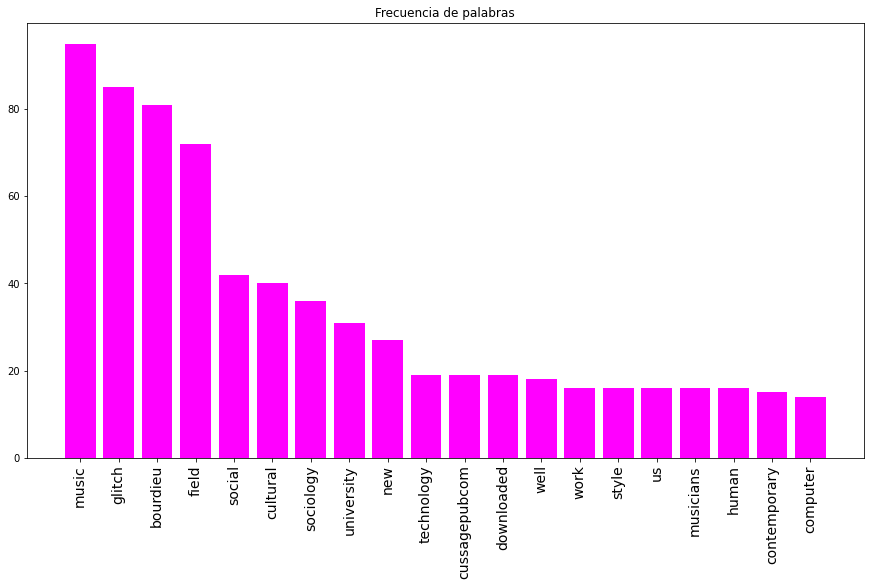

In [ ]:
# Establecemos el tamaño del gráfico en ancho x alto
plt.figure(figsize=(15, 8))

# Creamos el gráfico de barras
plt.bar(palabras, frecuencias, color='magenta')

# Establecemos el título del gráfico con un tamaño de fuente de 20
plt.title("Frecuencia de palabras", fontsize=30)

# Giramos la orientación de las palabras en el eje x
plt.xticks(rotation=90, fontsize=14)

# Establecemos el título del gráfico
plt.title("Frecuencia de palabras")


# Mostramos el gráfico
plt.show()


In [ ]:
!pip install gensim

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from gensim.summarization import summarize

import gensim

def preprocess_text(text):
  # Preprocesamos el texto
  tokens = gensim.utils.simple_preprocess(text)
  
  # Devolvemos los tokens
  return tokens

# Abre el archivo del documento que quieres resumir
filepath = "/content/drive/MyDrive/CURSOS/Mios/Nuevas Tecnologias para la Escena CPTI/Materiales/005 - Clase 5/Textos especificos/Putting a Glitch in the Field.pdf"
text = pdf_text(filepath)

# Preprocesamos el texto del PDF
tokens = preprocess_text(text)

# Generamos el resumen
resumen = summarize(text, word_count=300)
print(resumen)

actor network theory Bourdieu / field / glitch / Latour / sociology of music / sociology
From industry-specific patterns of ownership and control (Negus,1999) and the role of gatekeepers in decision-making chains (Ryan andPeterson, 1982) to technological mediators (Hennion, 1997) and the everydayexperiences of listeners (DeNora, 2000), sociologists have oriented to the waysin which music is imbricated with the social.
at Bobst Library, New York University on June 9, 2015 cus.sagepub.com Downloaded from rarely employed in the sociology of music, partly because its formulation
argued, the problem of technology does not feature highly enough in Bourdieu’s303 Putting a Glitch in the Field Prior
at Bobst Library, New York University on June 9, 2015 cus.sagepub.com Downloaded from associated with the music style known as glitch.
at Bobst Library, New York University on June 9, 2015 cus.sagepub.com Downloaded from and dance music festivals, film scores, radio airplay, as well as the odd car a

In [ ]:
stopwords = nltk.corpus.stopwords.words('english') + ["the", "of", "and", "to", "in", "as", "is", "it", "on", "that", "are", "for", "with", "by", "from", "at", "this", "such", "its", "but", "not", "an", "or", "be", "what", "one", "their", "these", "which", "between", "how", "york", "have", "into", "more", "also", "we", "bobst", "library", "june", "other", "well" "us", "prior", "while", "indeed", "production", "relations", "might", "they", "cambridge", "itself", "fields", "forms", "themselves", "all", "some", "without", "towards", "p", "putting", "practice", "ideas", "london", "been", "two", "presence", "possible", "most", "case",'i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', 'too', 'very', 's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', 've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn', "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn', "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't"]

# Preprocesamos el resumen para eliminar signos de puntuación y poner todas las palabras en minúsculas
tokens = nltk.word_tokenize(resumen)

# Eliminamos las palabras de la lista stopwords
tokens = [token.lower() for token in tokens if token.isalpha() and token.lower() not in stopwords]

# Calculamos la frecuencia de cada palabra
frecuencia = nltk.FreqDist(tokens) 

# Obtenemos las 5 palabras más frecuentes
palabras_mas_frecuentes = frecuencia.most_common(25)

# Imprimimos las palabras y sus frecuencias
print("Las 25 palabras más frecuentes son:")
for palabra, frecuencia in palabras_mas_frecuentes:
    print(f'{palabra}: {frecuencia} veces')

Las 25 palabras más frecuentes son:
music: 10 veces
glitch: 7 veces
new: 6 veces
university: 6 veces
downloaded: 6 veces
bourdieu: 5 veces
field: 5 veces
sociology: 3 veces
latour: 2 veces
social: 2 veces
style: 2 veces
need: 2 veces
actor: 1 veces
network: 1 veces
theory: 1 veces
patterns: 1 veces
ownership: 1 veces
control: 1 veces
role: 1 veces
gatekeepers: 1 veces
chains: 1 veces
ryan: 1 veces
andpeterson: 1 veces
technological: 1 veces
mediators: 1 veces


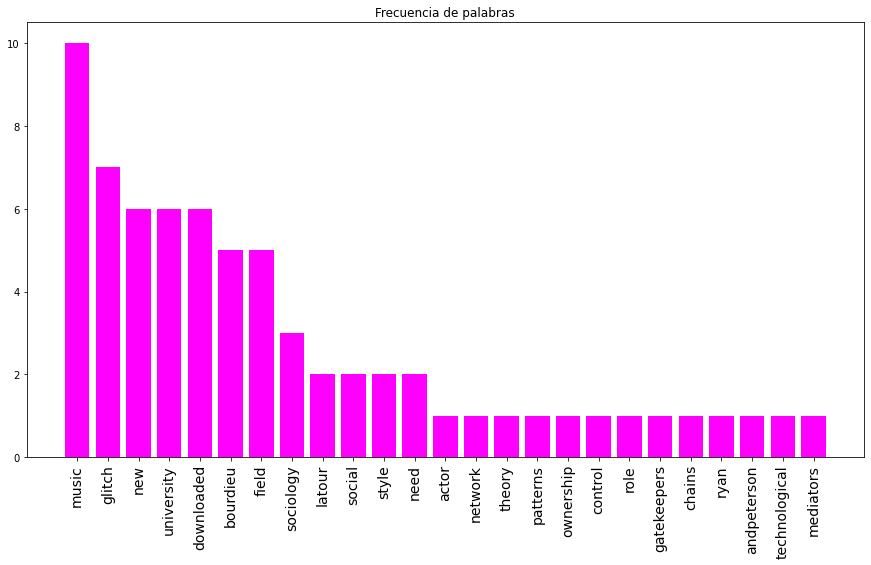

In [ ]:
# Creamos dos listas con las palabras y sus frecuencias
palabras = [palabra for palabra, frecuencia in palabras_mas_frecuentes]
frecuencias = [frecuencia for palabra, frecuencia in palabras_mas_frecuentes]

# Establecemos el tamaño del gráfico en ancho x alto
plt.figure(figsize=(15, 8))

# Creamos el gráfico de barras
plt.bar(palabras, frecuencias, color='magenta')

# Establecemos el título del gráfico con un tamaño de fuente de 20
plt.title("Frecuencia de palabras", fontsize=30)

# Giramos la orientación de las palabras en el eje x
plt.xticks(rotation=90, fontsize=14)

# Establecemos el título del gráfico
plt.title("Frecuencia de palabras")

# Mostramos el gráfico
plt.show()

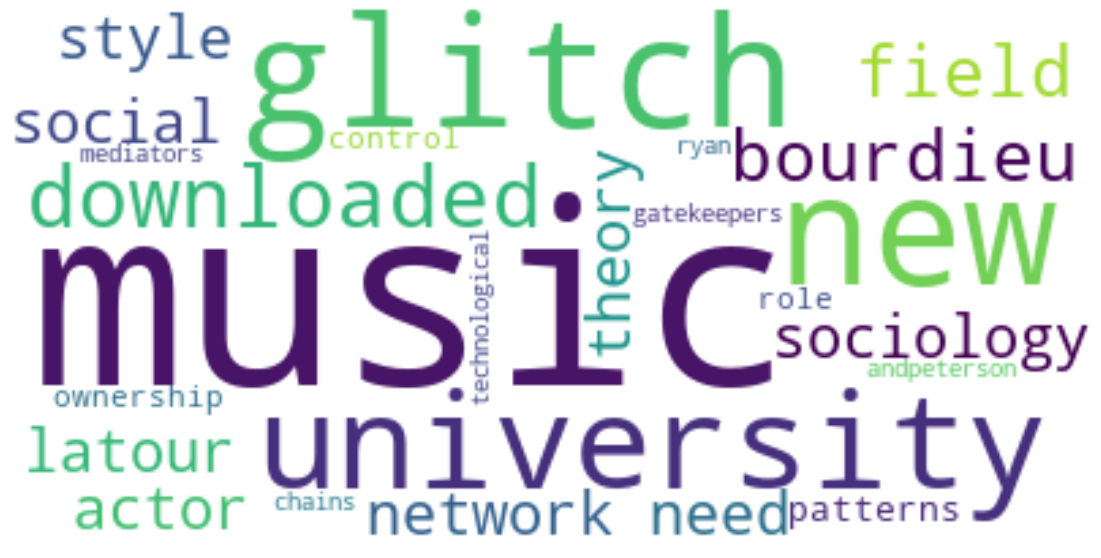

In [ ]:
# Unimos las palabras de la lista en una cadena de caracteres
texto = ' '.join([palabra for palabra, frecuencia in palabras_mas_frecuentes])

# Generamos la nube de palabras a partir de la cadena de caracteres
wordcloud = WordCloud().generate(texto)

# Establecemos el color de fondo en blanco
wordcloud.background_color = "white"

# Establecemos una función para determinar el color de cada palabra
def color_func(word, font_size, position, orientation, random_state=None, **kwargs):
    return "hsl(0, 100%%, %d%%)" % randint(120, 300)

wordcloud.color_func = color_func

# Establecemos el tamaño máximo de la fuente en 40
wordcloud.max_font_size = 40

#Tamaño del grafico
plt.figure(figsize=(50,10))

# Mostramos la nube de palabras
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()